In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

**Data Preprocessing**

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/RamCharanDevathi/Hackverse-2.0/main/sepsis.csv",error_bad_lines=False)

In [ ]:
from sklearn.utils import resample
df_major=data[data.SepsisLabel==0]
df_minor=data[data.SepsisLabel==1]

In [ ]:
df_minor_upsample=resample(
df_minor,
replace=True,
n_samples=37945,
random_state=123)

In [ ]:
df_upsampled=pd.concat([df_major,df_minor_upsample])
df_upsampled.SepsisLabel.value_counts()

1    37945
0    37945
Name: SepsisLabel, dtype: int64

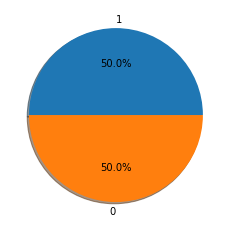

In [ ]:
plt.pie(df_upsampled['SepsisLabel'].value_counts(),labels=['1','0'],autopct='%1.1f%%',shadow=True)
plt.show()

In [ ]:
x=df_upsampled[df_upsampled.columns[0:40]].values
y=df_upsampled[df_upsampled.columns[40:]].values

In [ ]:
print("Train:",x.shape)
print("Total:",df_upsampled.shape)
print("Test:",y.shape)

Train: (75890, 40)
Total: (75890, 41)
Test: (75890, 1)


In [ ]:
label_model=LabelEncoder()
y=label_model.fit_transform(y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Splitting the dataset for training and testing**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

**MLPClassifier - Defining the model**

In [ ]:
model=MLPClassifier(
activation='tanh',
solver='lbfgs',
early_stopping=False,
hidden_layer_sizes=(40,10,10,10,10,2),
random_state=1,
batch_size='auto',
max_iter=5000,
learning_rate_init=1e-5,
tol=1e-4)

**Training the model with training data**

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40, 10, 10, 10, 10, 2),
              learning_rate='constant', learning_rate_init=1e-05, max_fun=15000,
              max_iter=5000, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=1,
              shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)

**Predicting the test value to find the accuracy**

In [ ]:
pred=model.predict(x_test)

**Accuracy of model**

In [ ]:
idx=0
cor=0
incor=0
for i in x_test:
  if(pred[idx]==y_test[idx]):
    cor+=1
  else:
    incor+=1
  idx+=1
print("Accuarcy of model:",((cor)/(cor+incor))*100)

Accuarcy of model: 93.22703913559099


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,pred)
print(mat)

[[6702  855]
 [ 173 7448]]
